In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [8]:
import os
os.getcwd()

'/home/kcekini/progetti/DM/src/data_preparation'

In [9]:
df = pd.read_csv("./../../data/newFeatures.csv", skipinitialspace=True, sep=',')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174207 entries, 0 to 174206
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             174207 non-null  object 
 1   state                            174207 non-null  object 
 2   ratio_n_participants_child_mean  147899 non-null  float64
 3   ratio_n_participants_teen_mean   149968 non-null  float64
 4   ratio_n_participants_adult_mean  150108 non-null  float64
 5   ratio_n_males_mean               165235 non-null  float64
 6   ratio_n_females_mean             150108 non-null  float64
 7   ratio_n_killed_mean              174195 non-null  float64
 8   ratio_n_arrested_mean            173543 non-null  float64
 9   ratio_n_unharmed_mean            173560 non-null  float64
 10  ratio_n_injured_mean             174196 non-null  float64
 11  ratio_n_participants_mean        154912 non-null  float64
 12  n_

In [11]:
# Per ogni giorno registrato, osservo quanti incidenti si sono verificati in ogni stato
c = df.groupby(by=["date", "state"], dropna=False).size()
c_r = c.reset_index(name='count')

In [12]:
heatmap_data = c_r.pivot_table(index=['state'], columns='date', values='count')

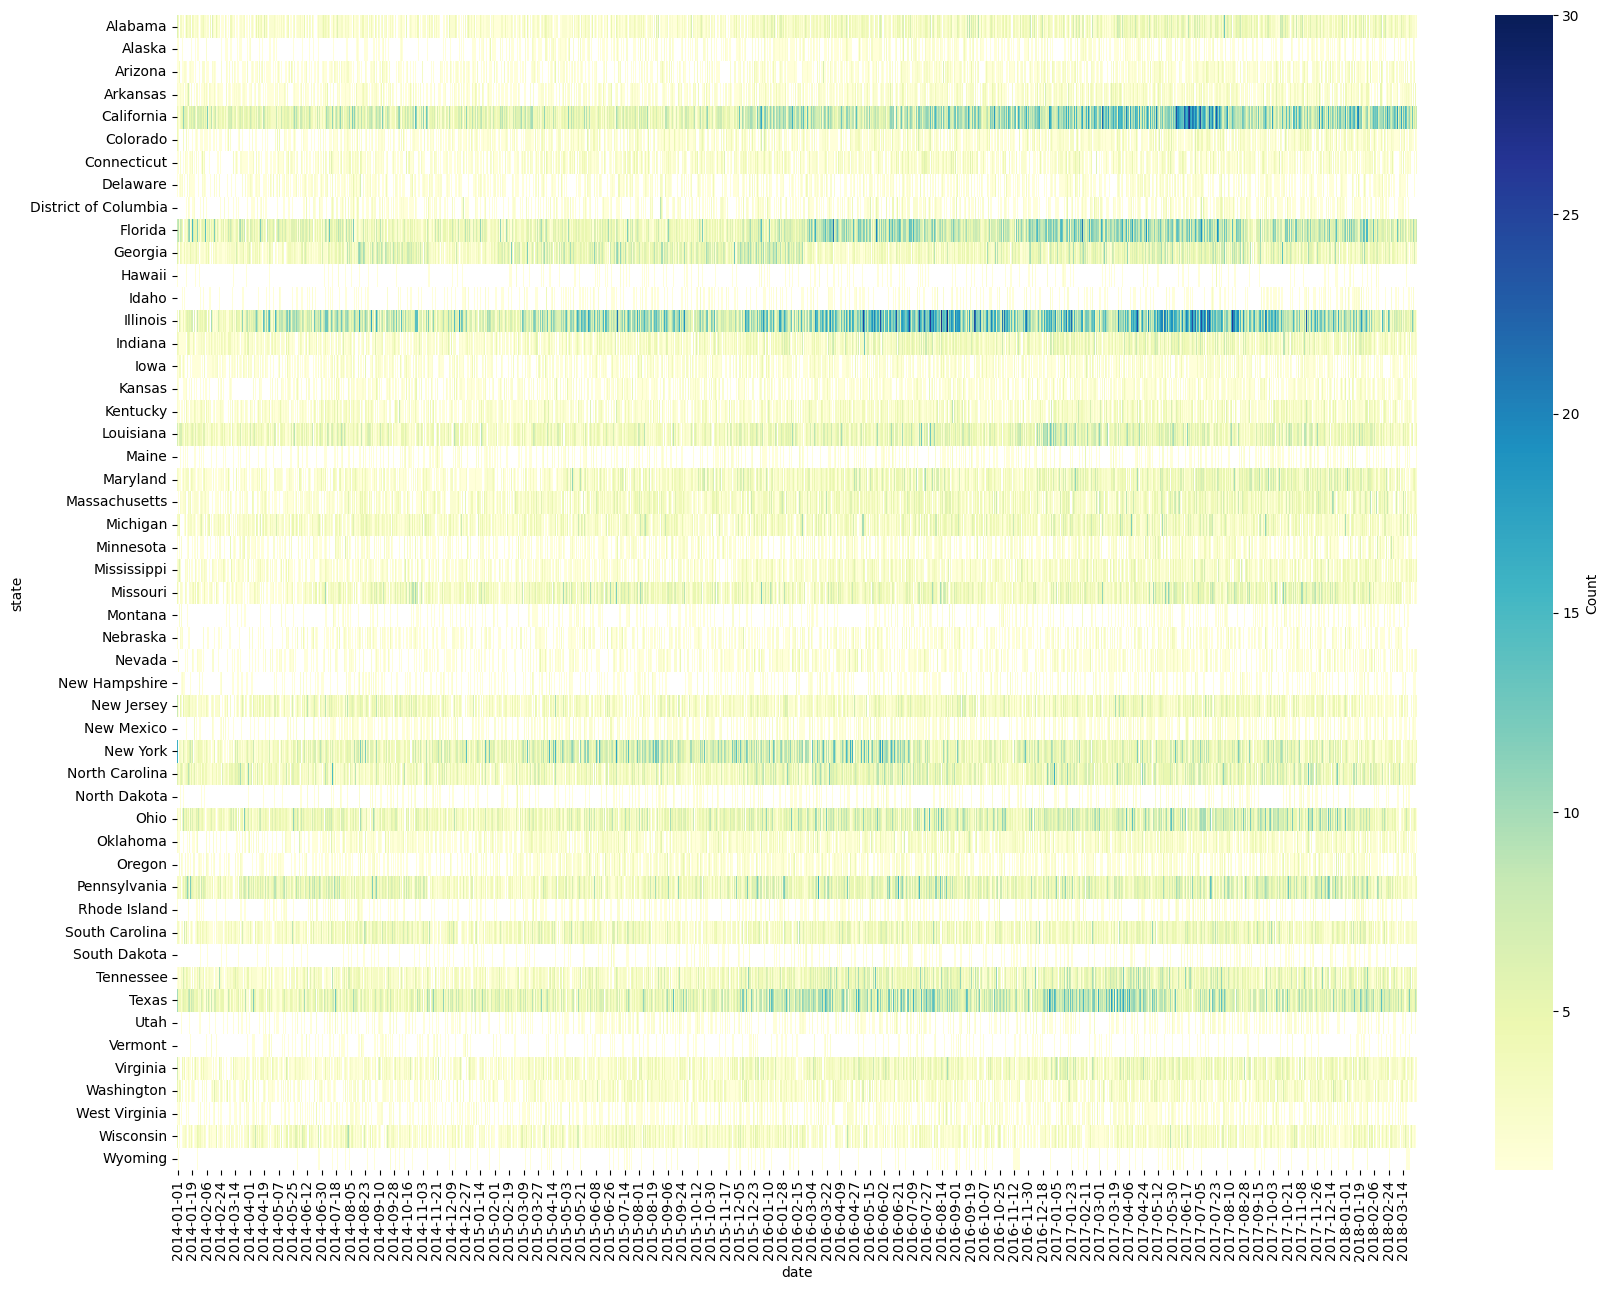

In [13]:
plt.figure(figsize=[20,15])
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.show()
#Si nota che una particolare incidenza degli incidenti risale all'estate del 2016 nello stato Illinois

In [14]:
minmax_scaler = MinMaxScaler()

norm_df = df
norm_df.drop(['date', 'state'], axis=1, inplace=True)
column_names = list(norm_df.columns.values)
norm_df = minmax_scaler.fit_transform(norm_df.values)


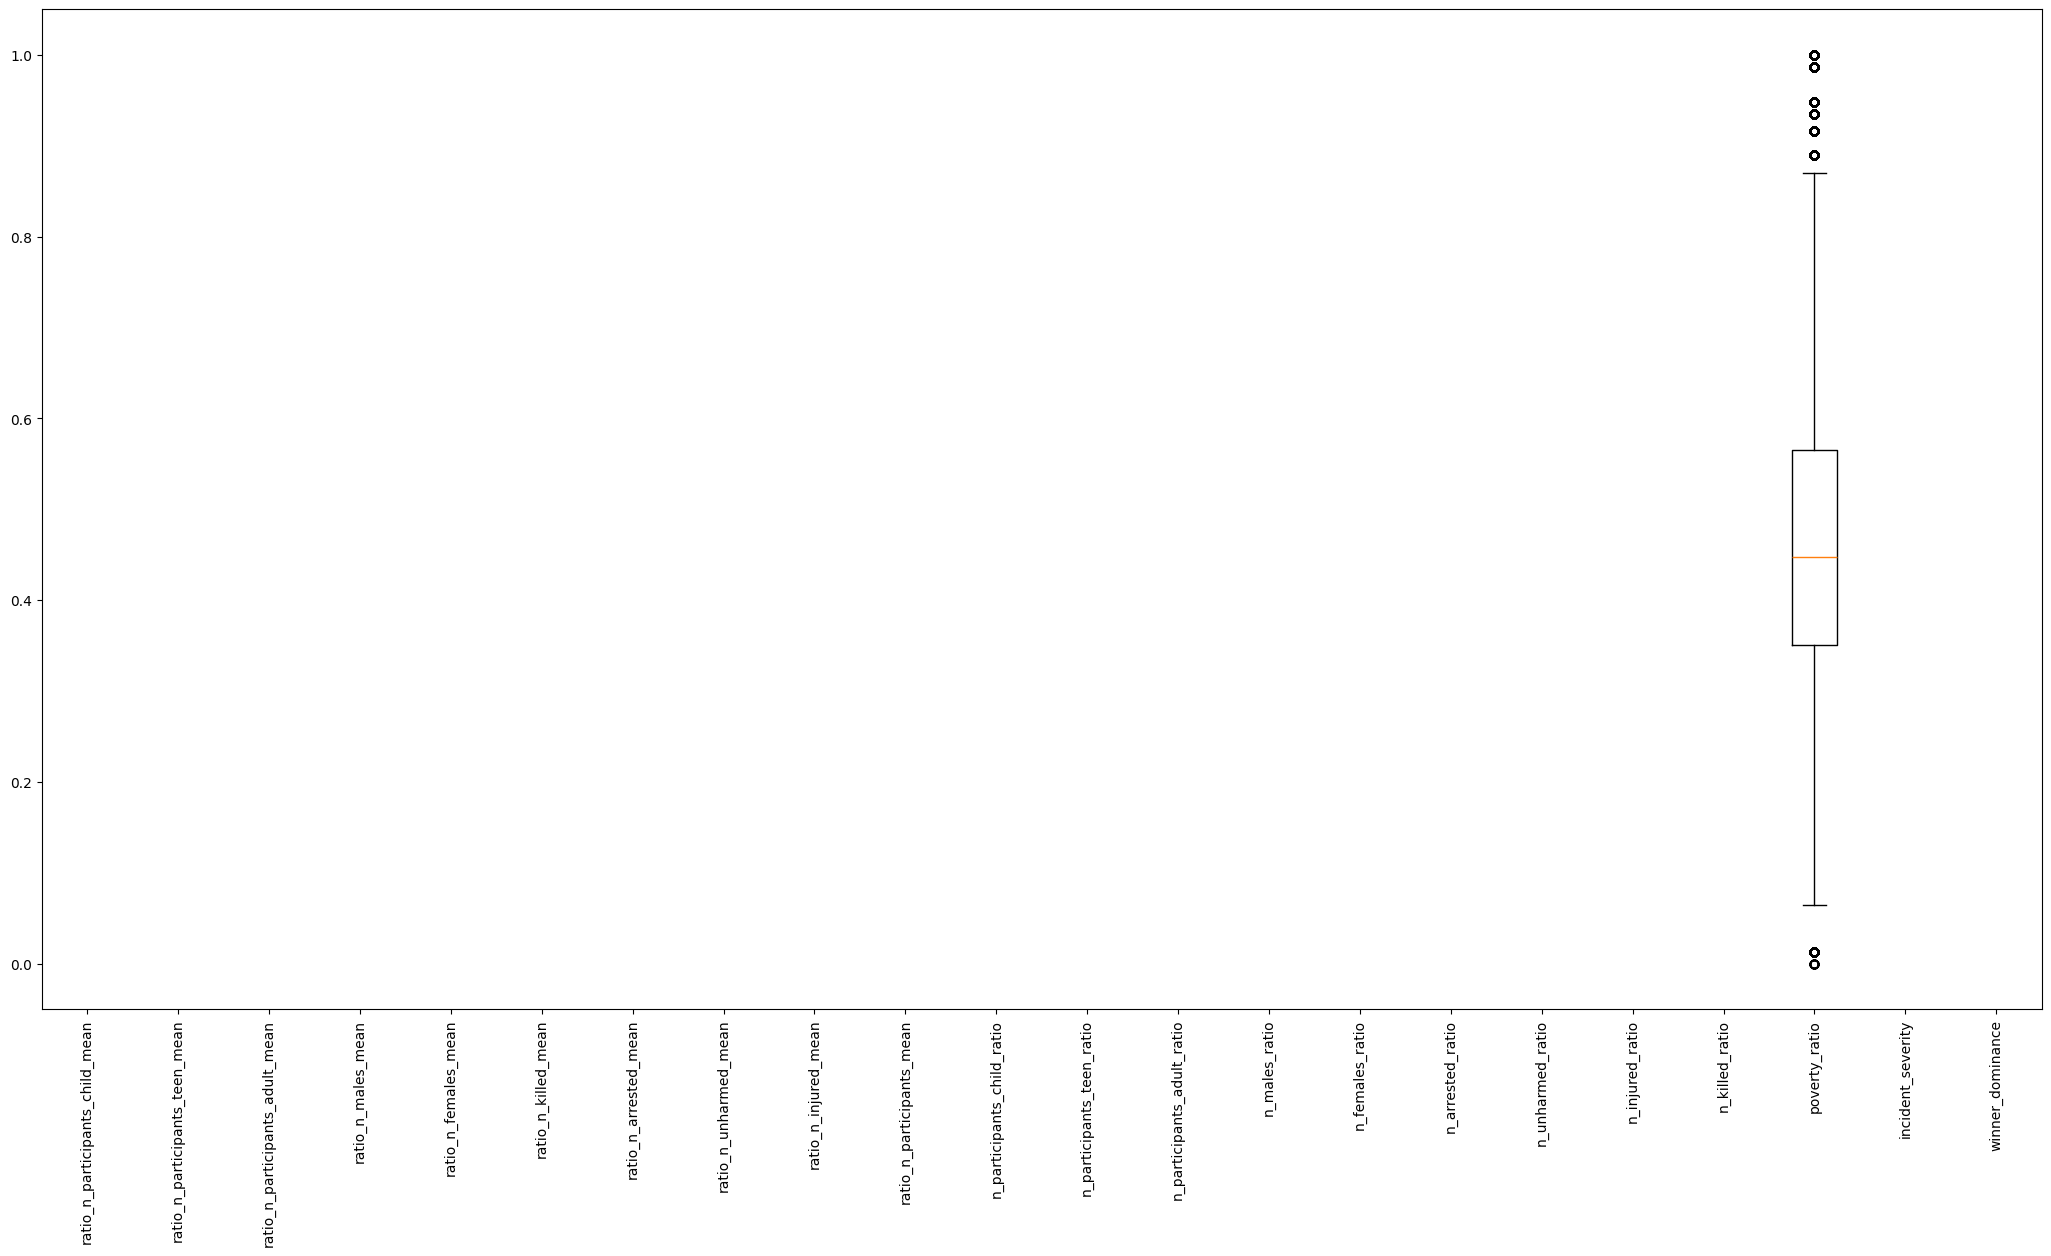

In [15]:
fig = plt.figure(figsize = (20, 10))
 
ax = fig.add_axes([0, 0, 1, 1])
r = list(range(1, 23))

# Creating plot
bp = ax.boxplot(norm_df)
plt.xticks(r, column_names, rotation=90)

# Show plot
plt.show()

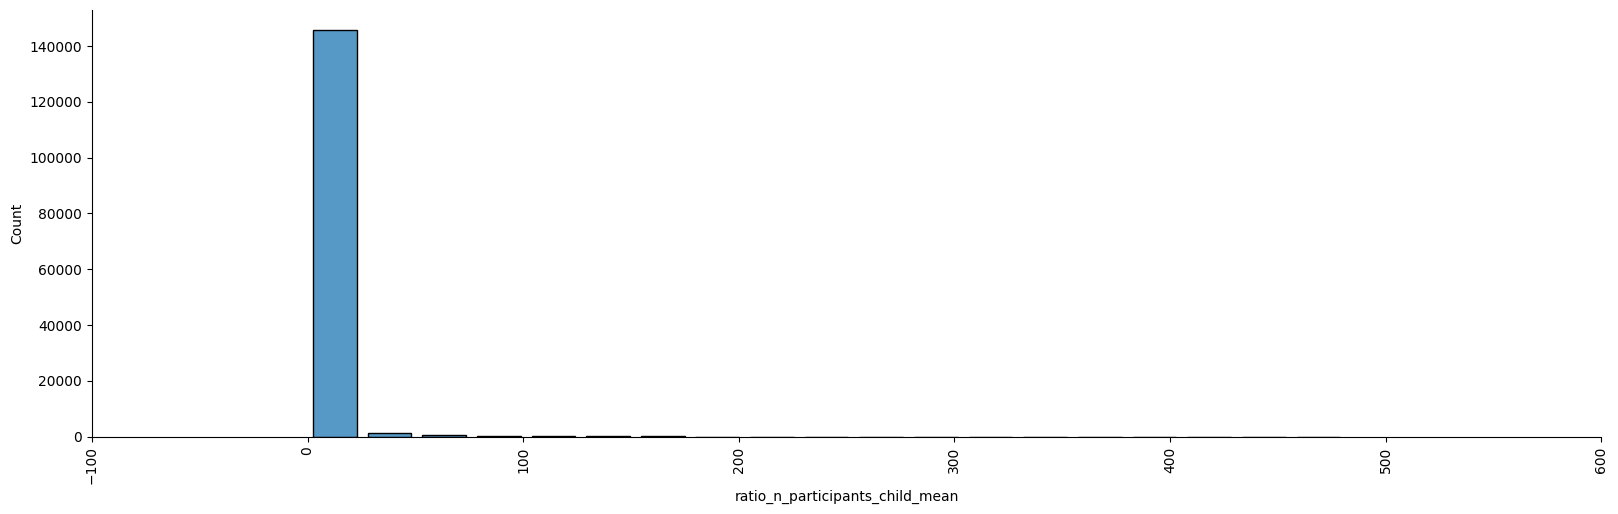

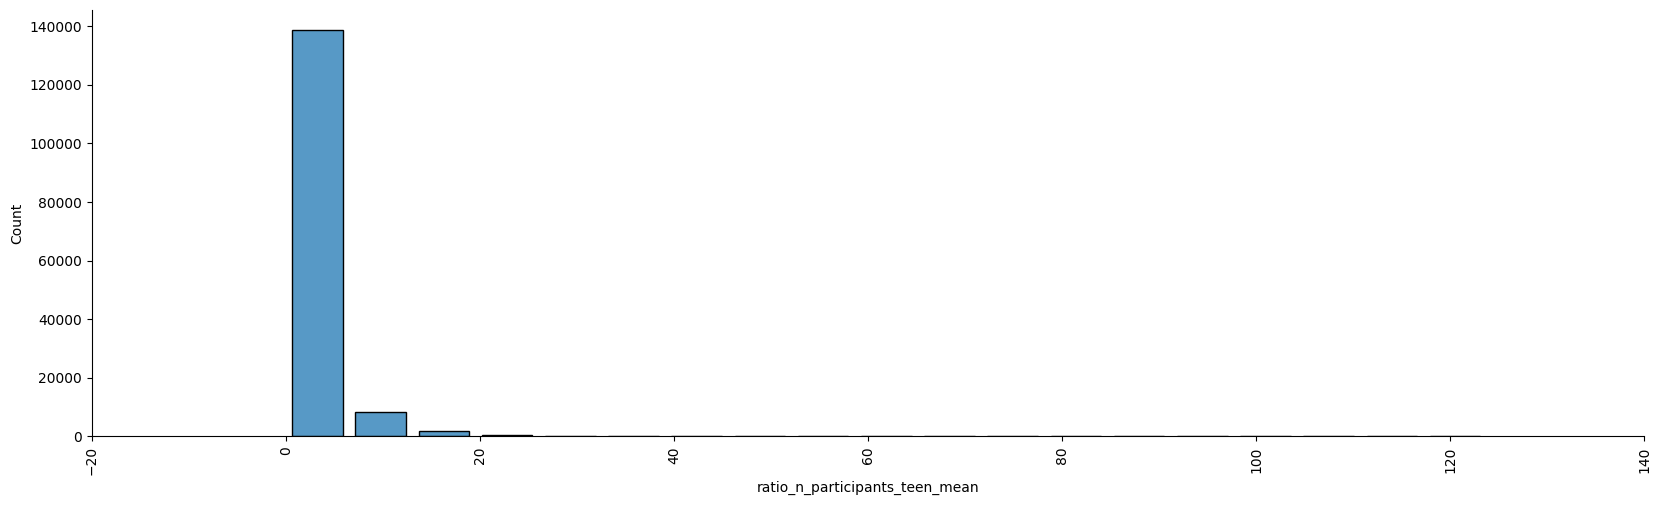

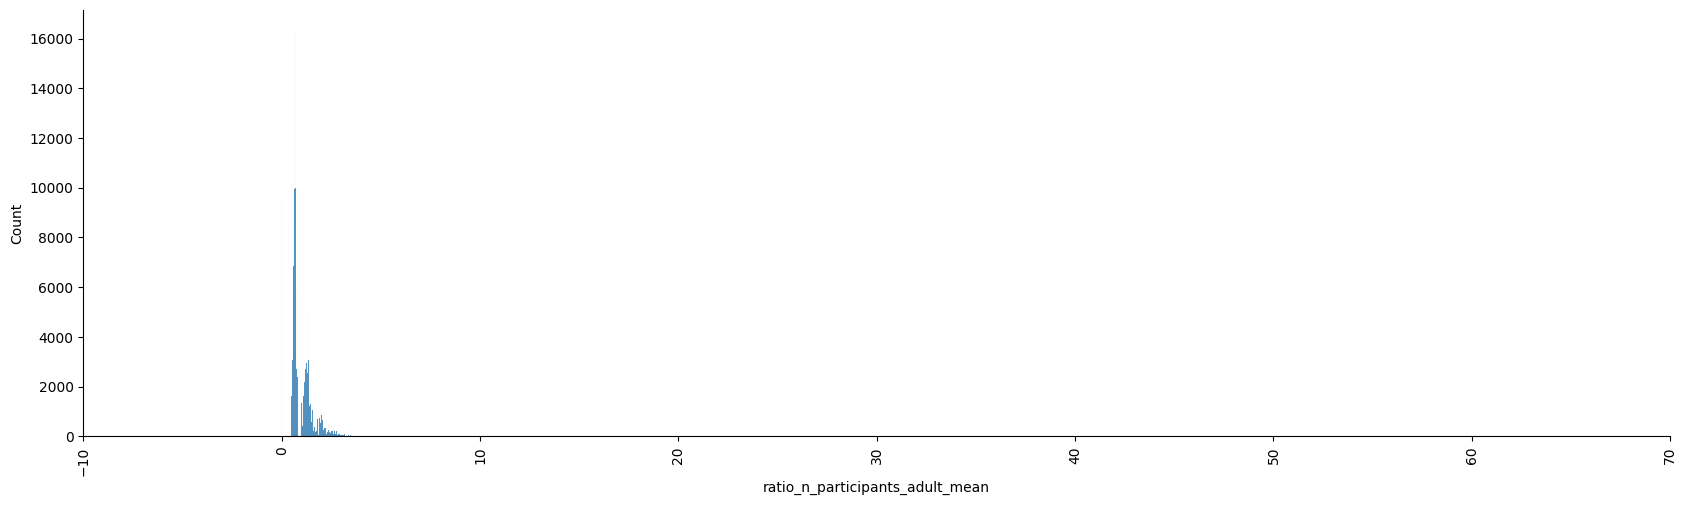

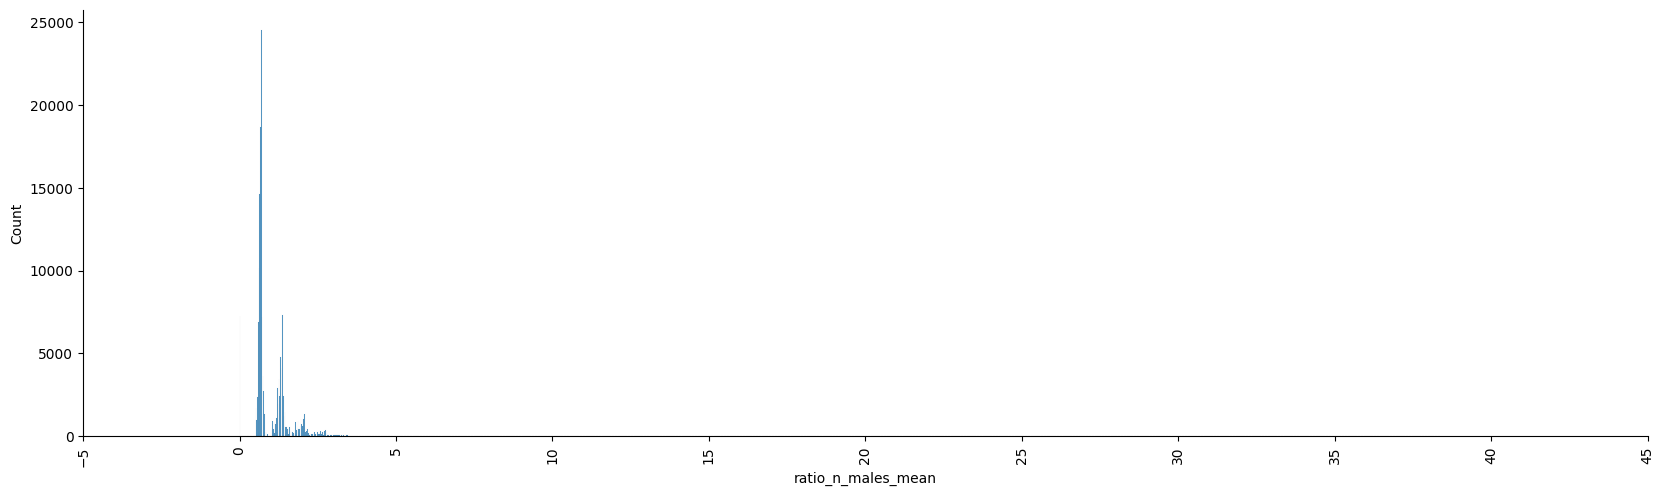

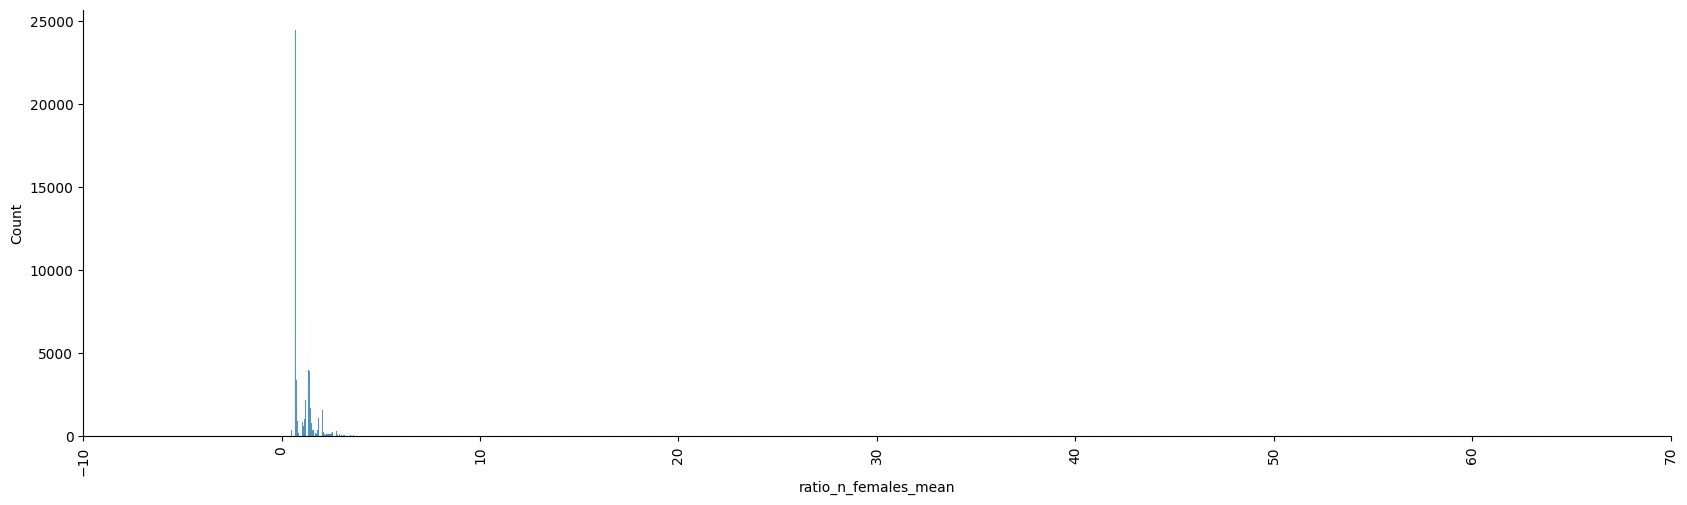

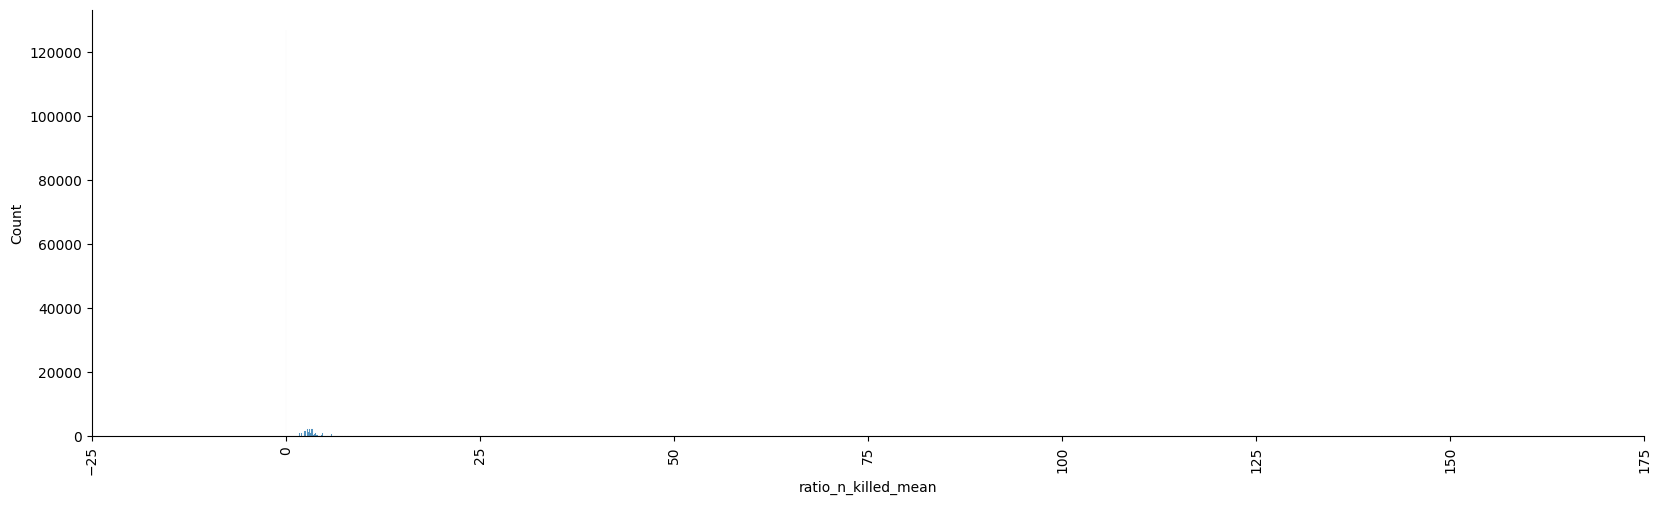

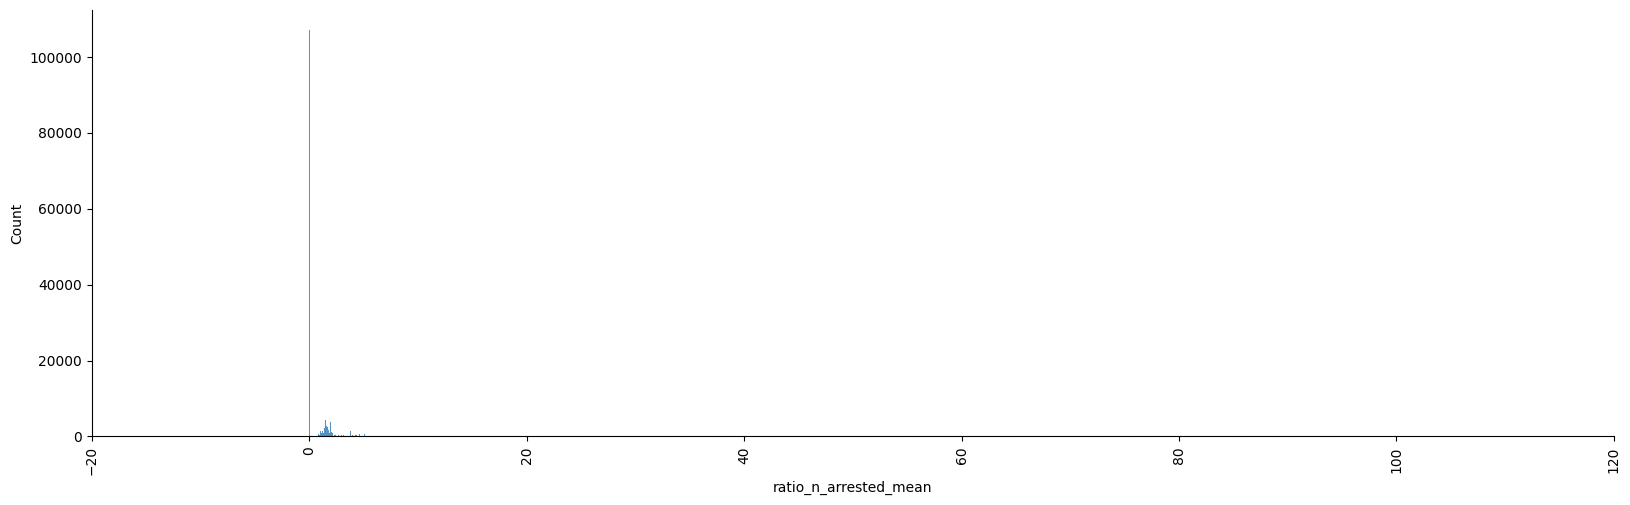

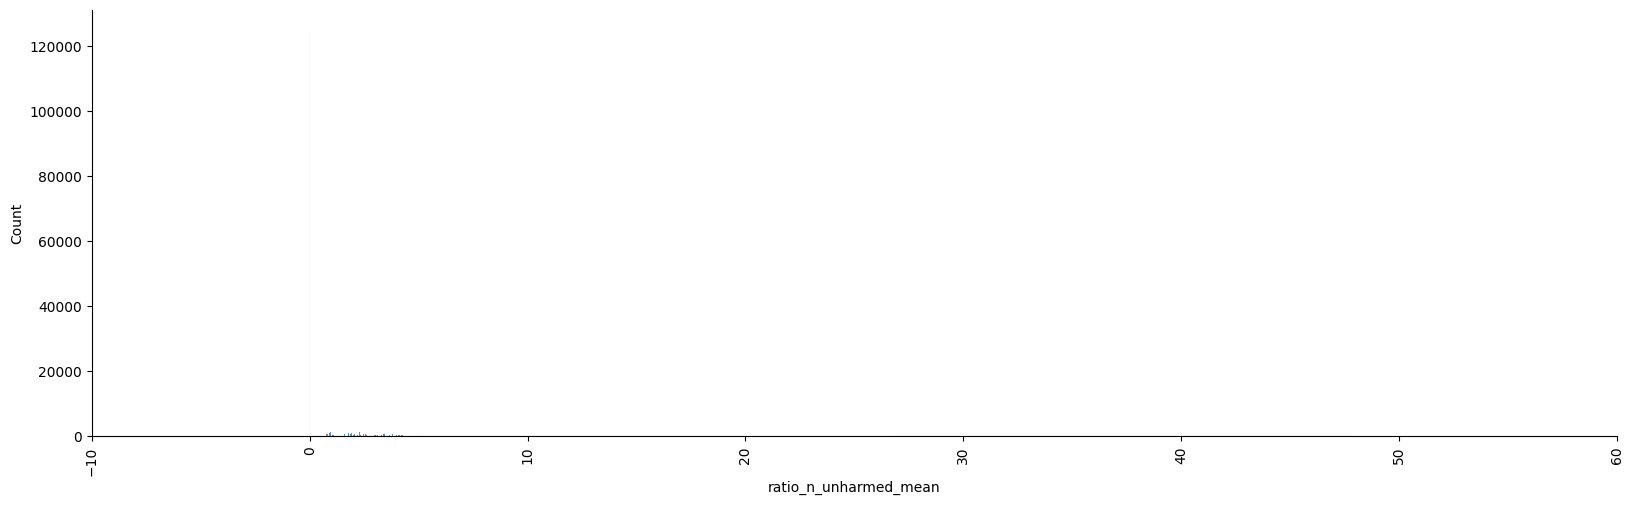

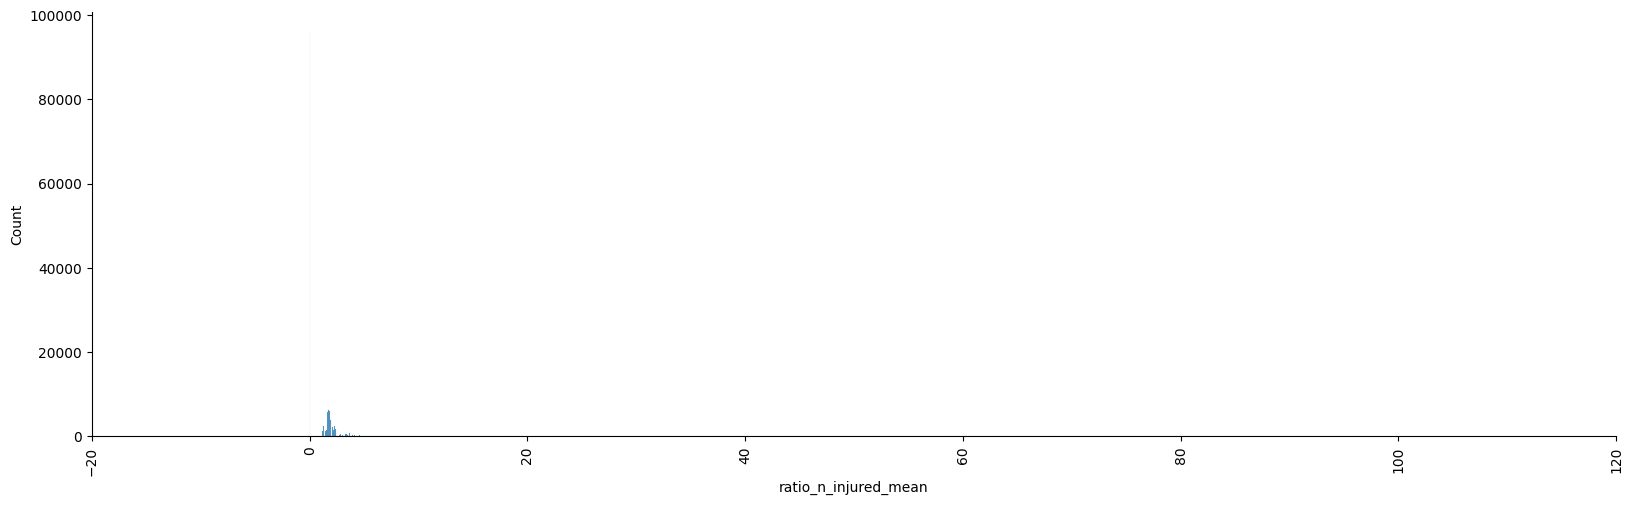

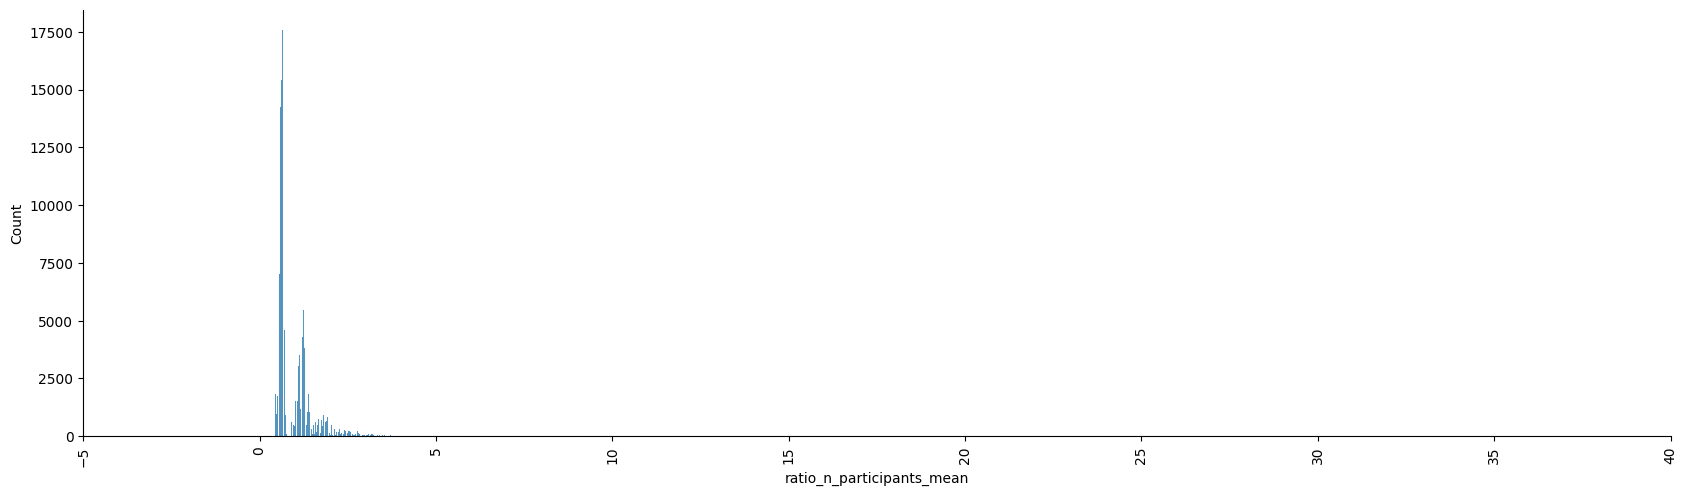

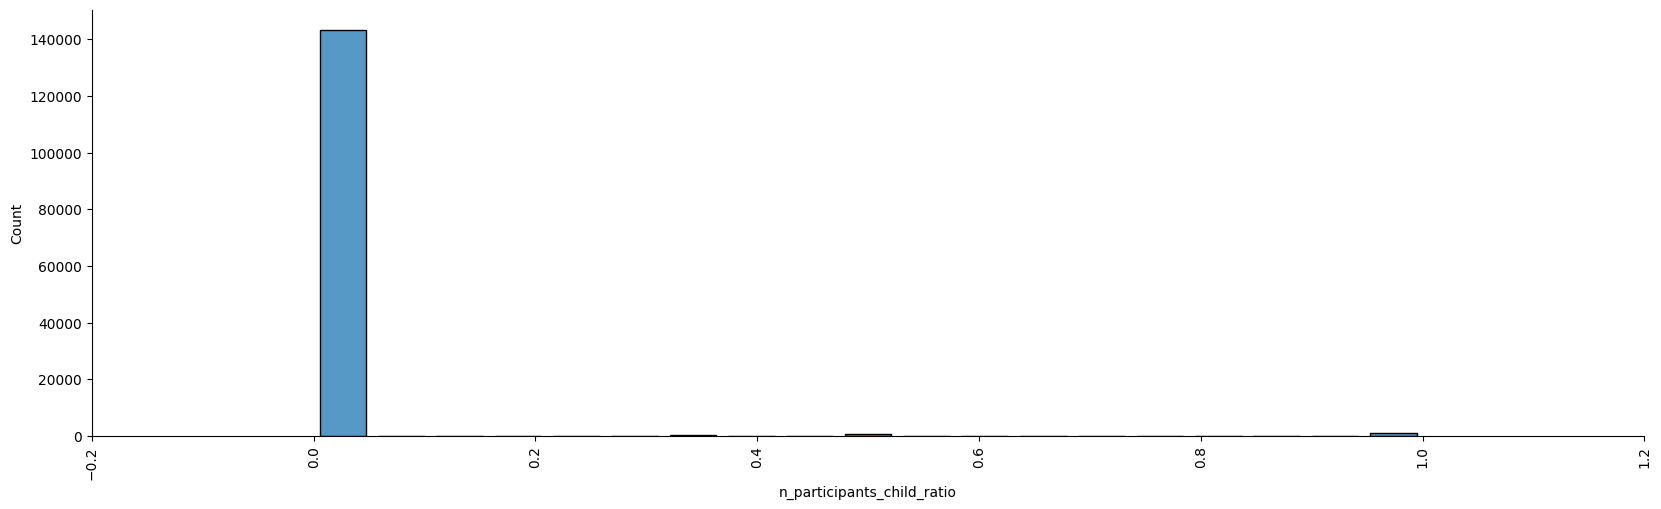

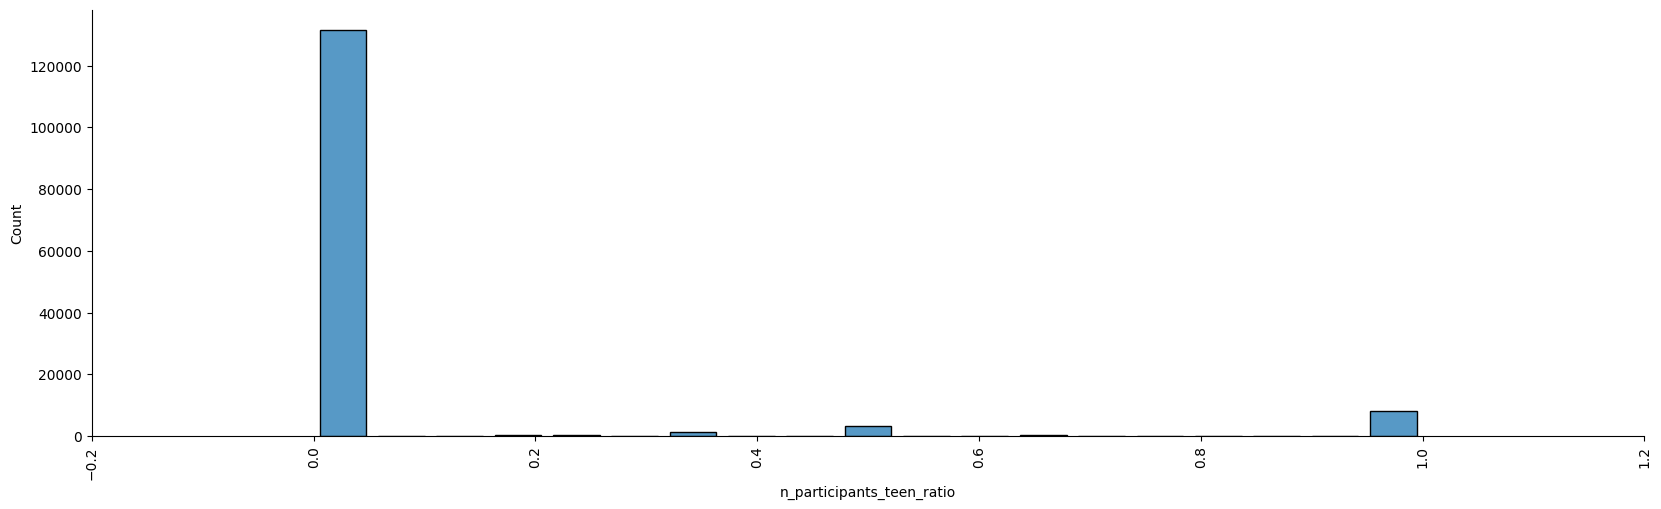

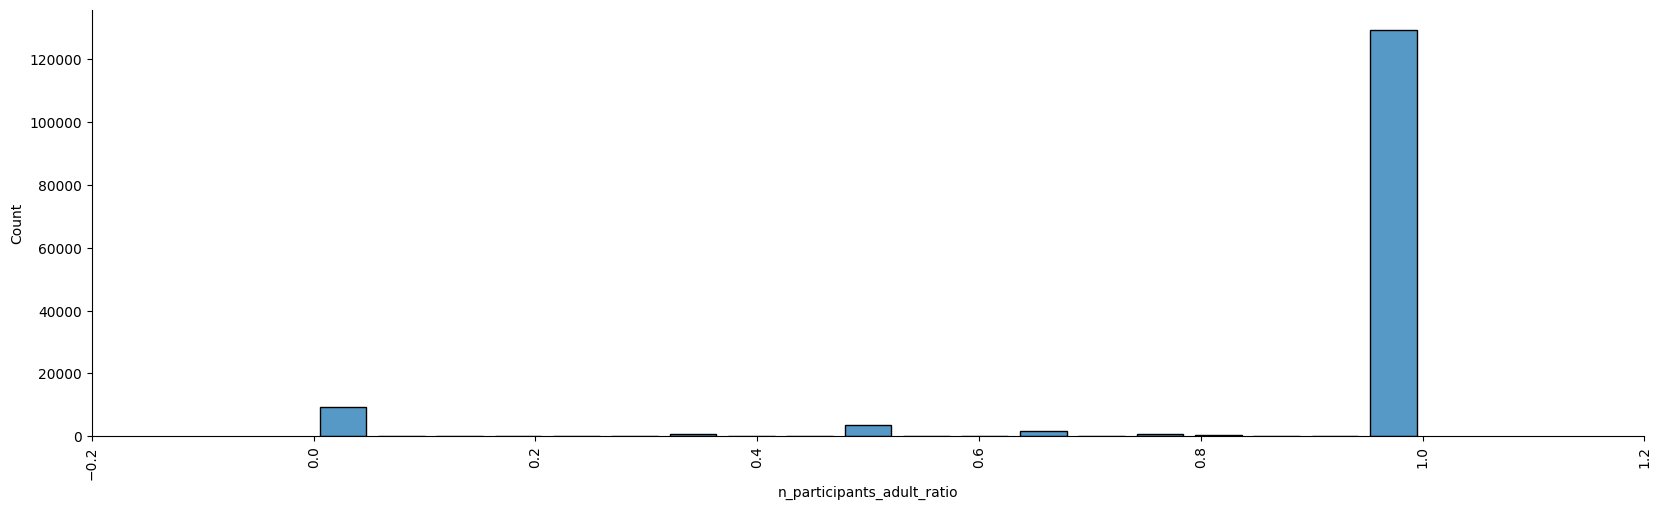

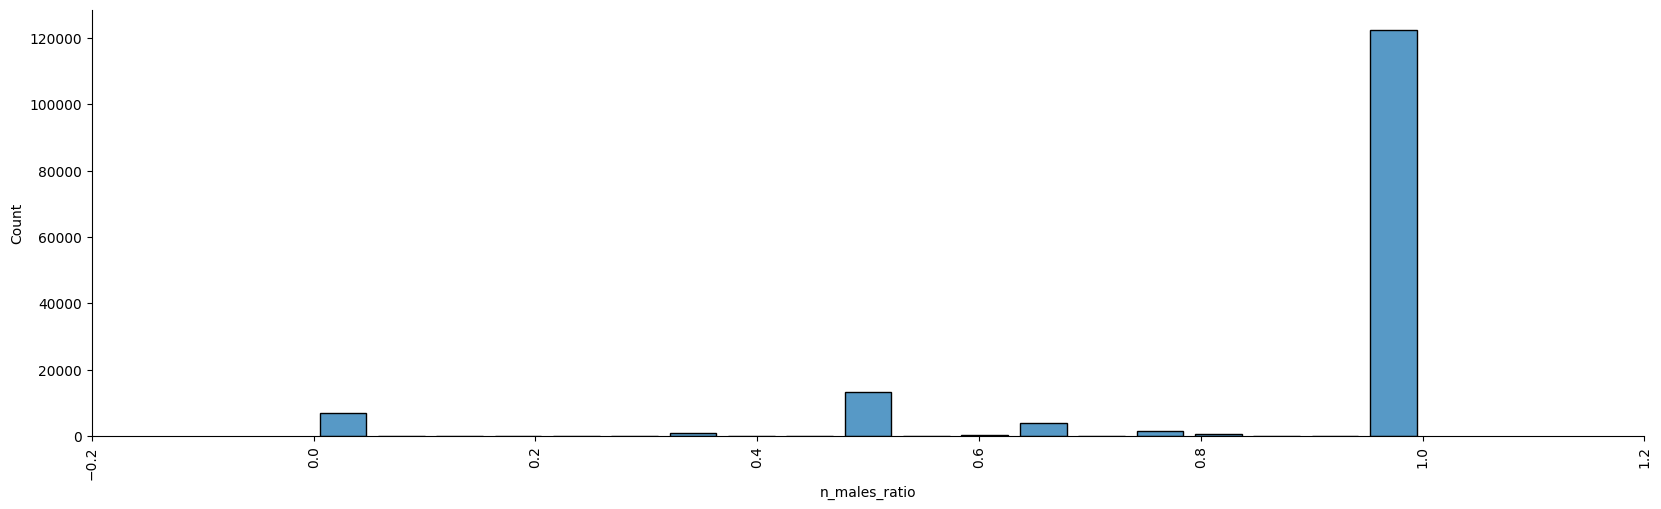

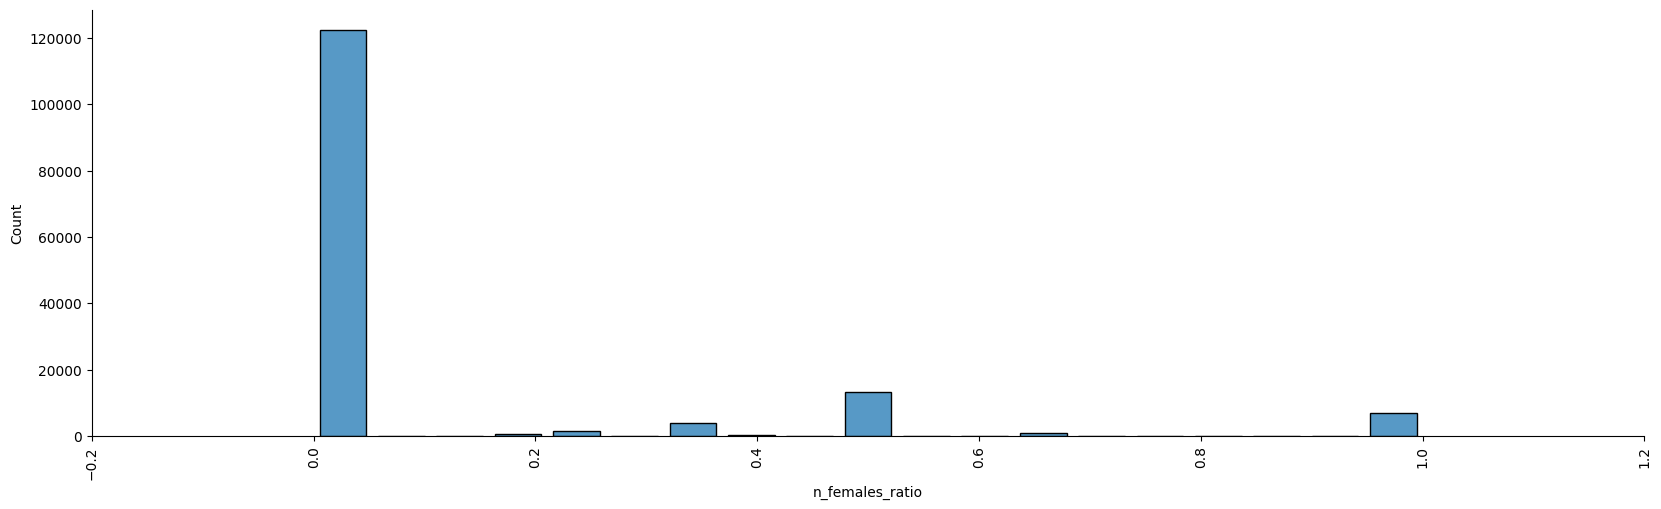

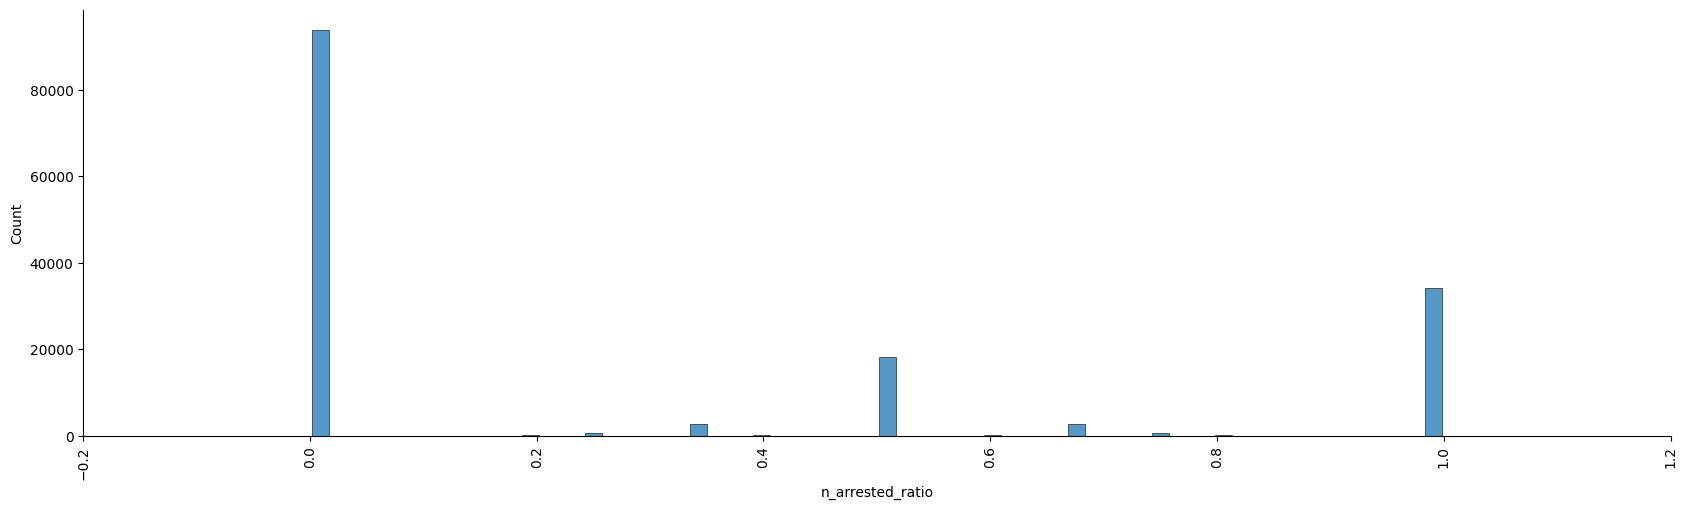

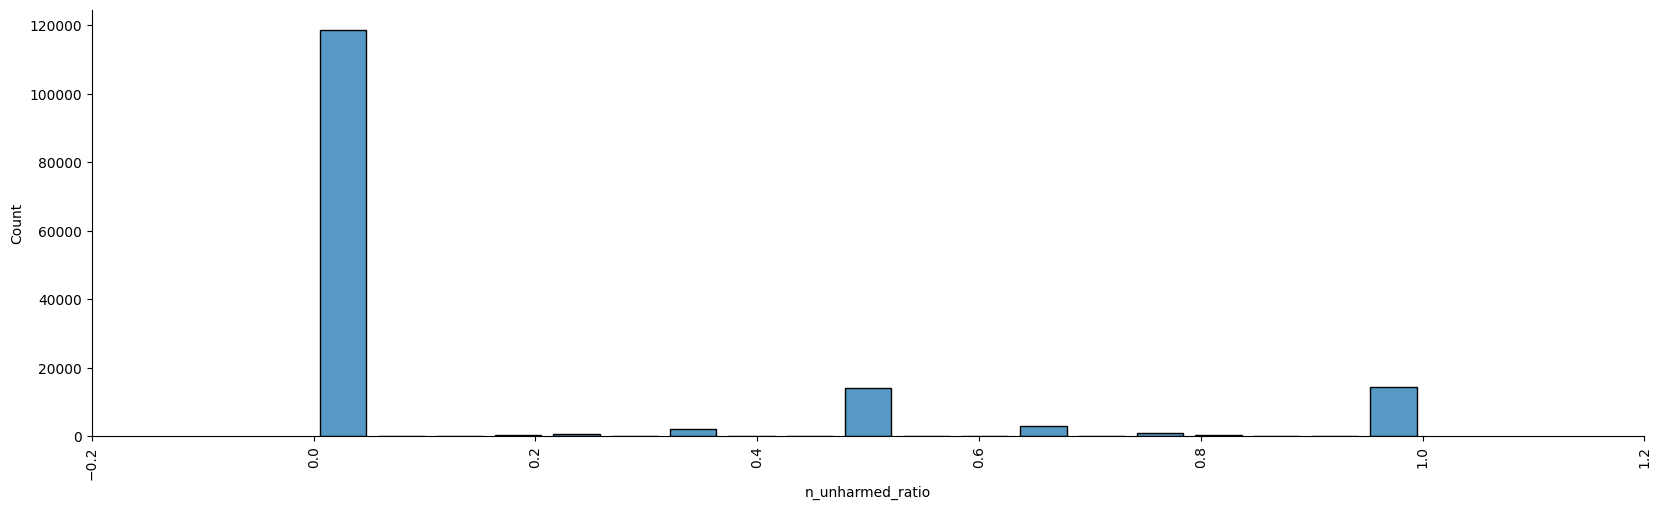

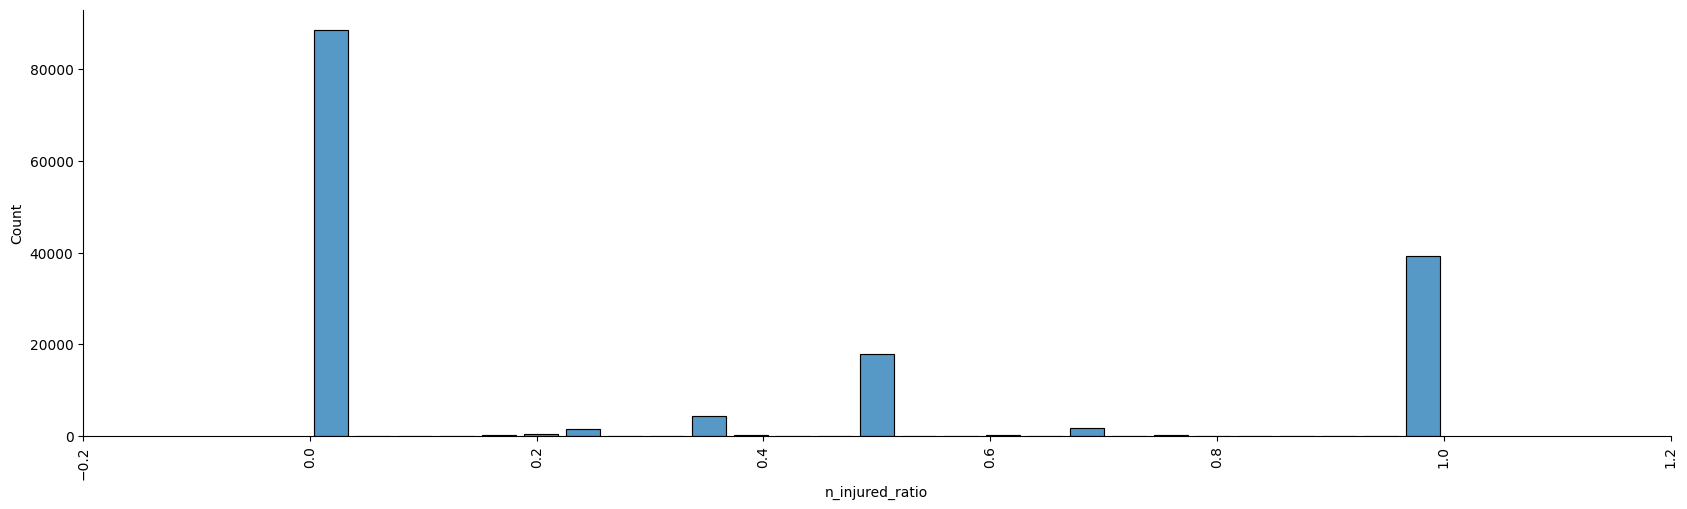

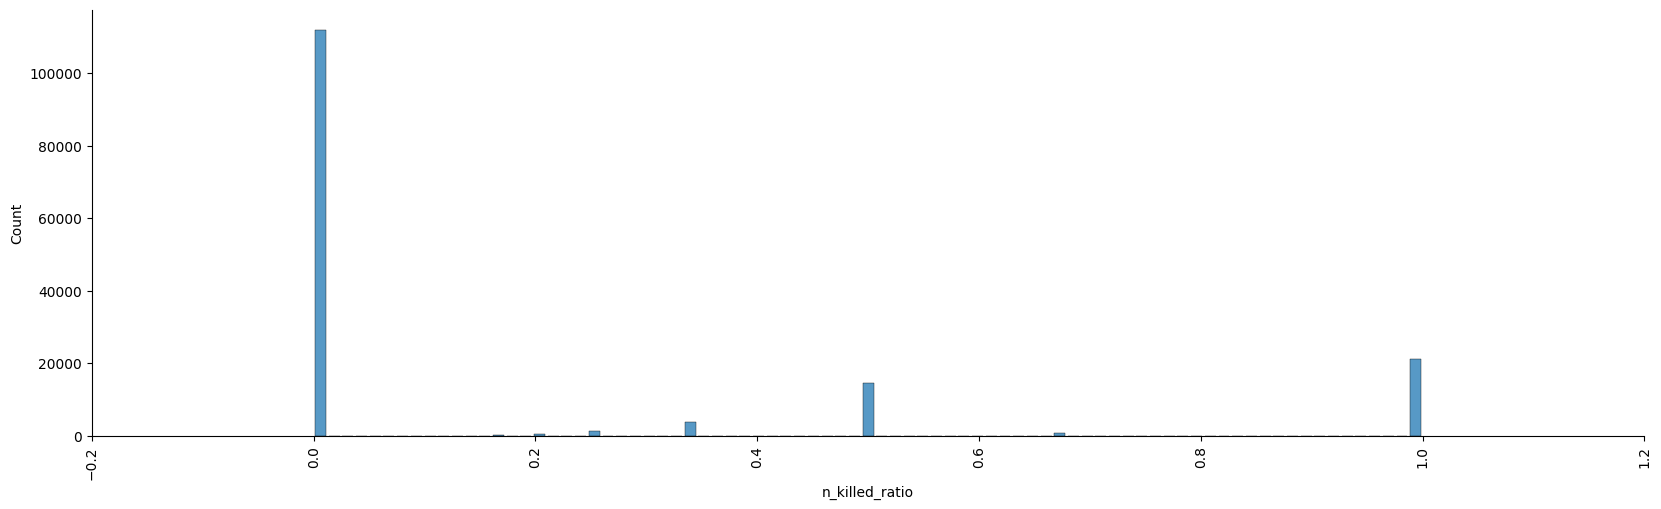

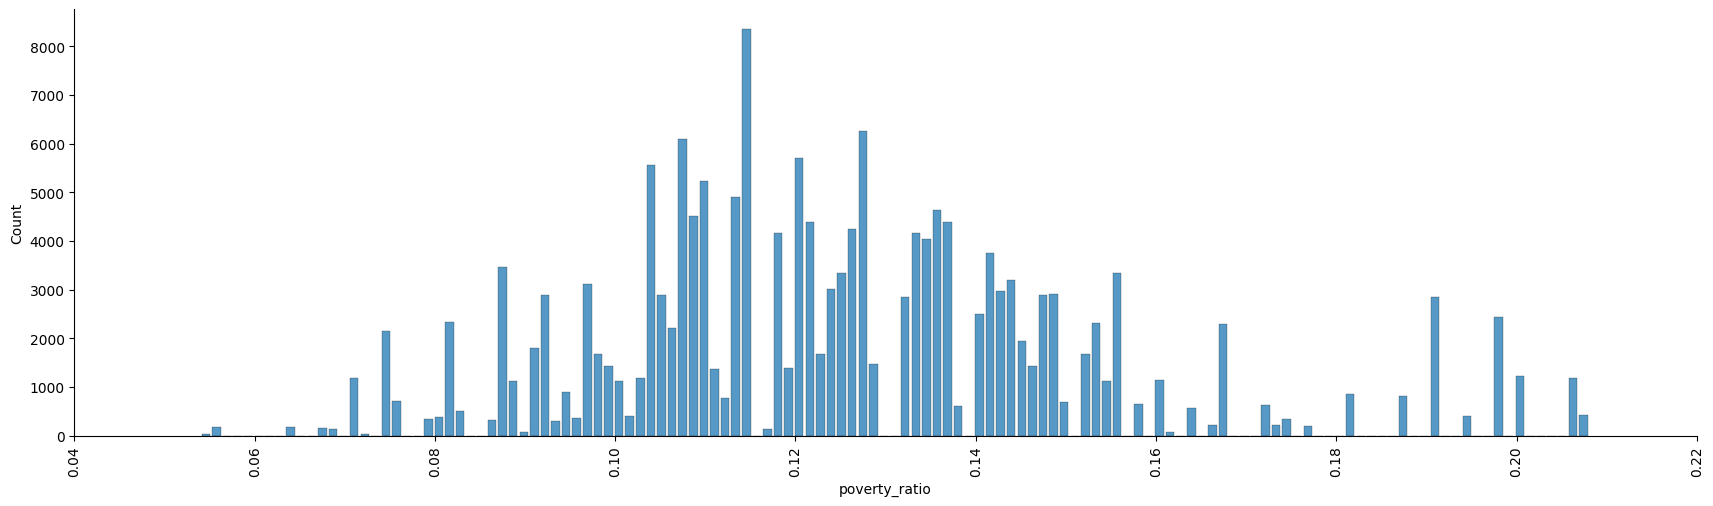

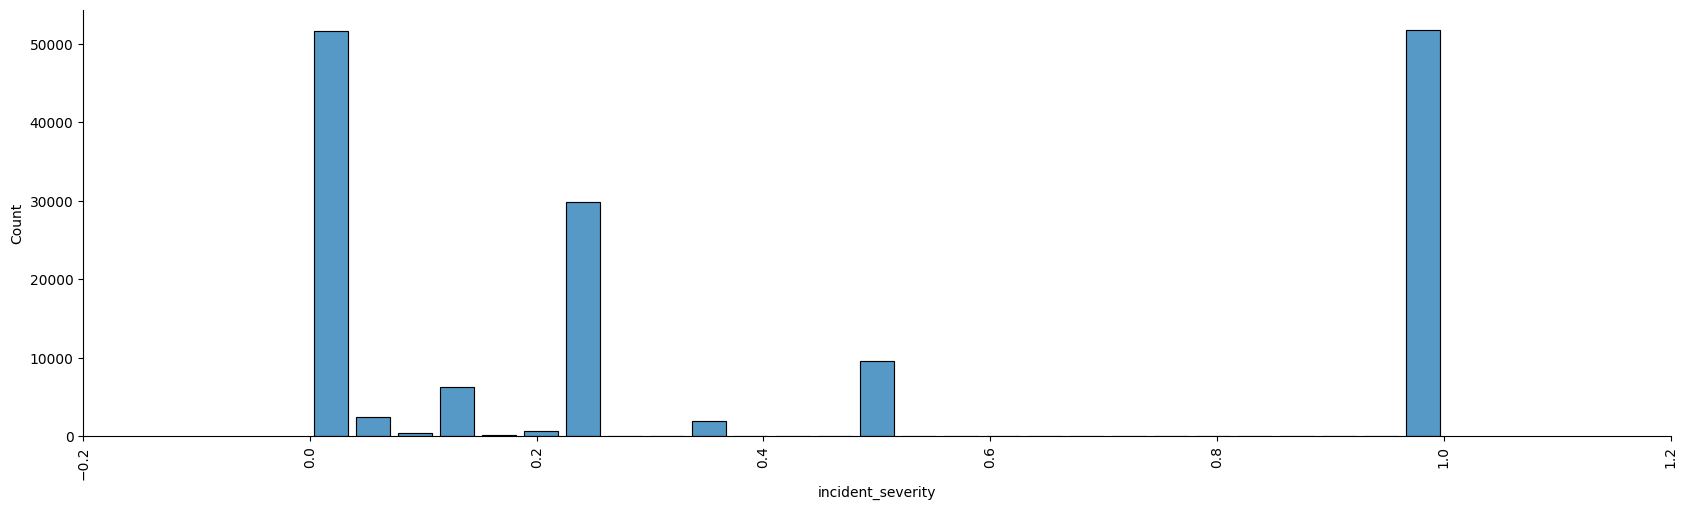

In [16]:
for variable in column_names[:-1]: 
    p = sns.displot(df, x=variable, shrink=.8)
    p.set_xticklabels(rotation=90)
    p.fig.set_size_inches(20,5)